<a href="https://colab.research.google.com/github/oski99/garson/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


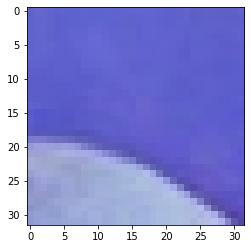

In [ ]:
lena = cv2.imread('/content/drive/MyDrive/deep_learning/lena.jpg')

def random_bg():
  width = random.randint(0,256-32)
  height = random.randint(0,256-32)
  return lena[width:width+32,height:height+32,:].copy()
plt.imshow(random_bg())

In [ ]:
width = 16
height = 16
thickness = 2
white_color = (255,255,255)
canvas = np.zeros((width,height,3), dtype='uint8')

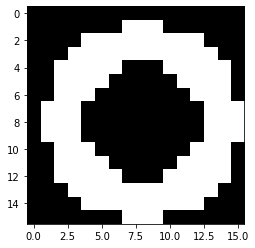

In [ ]:
circle_shape = cv2.circle(canvas.copy(), (width//2, height//2), radius=(width//2) - thickness, color=white_color, thickness=thickness)
plt.imshow(circle_shape)

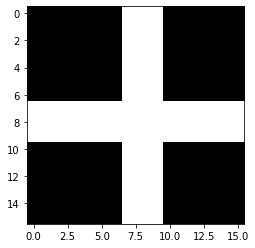

In [ ]:
plus_shape = cv2.line(canvas.copy(), (width//2, 0), (width//2, height), color=white_color, thickness=thickness)
plus_shape = cv2.line(plus_shape, (0, height//2), (width, height//2), color=white_color, thickness=thickness)
plt.imshow(plus_shape)

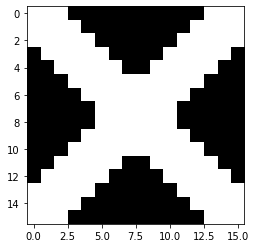

In [ ]:
cross_shape = cv2.line(canvas.copy(), (0, 0), (width, height), color=white_color, thickness=thickness)
cross_shape = cv2.line(cross_shape, (-1, height), (width-1, 0), color=white_color, thickness=thickness)
plt.imshow(cross_shape)

In [ ]:
def generate32(shape):
  canvas = np.zeros((32,32))
  images = []
  for x in range(17): 
    for y in range(17): 

      blank_image = canvas.copy()   
      blank_image[x:x+16,y:y+16] = shape[:,:,1]
      new_image = cv2.add(blank_image, canvas) 
      images.append(new_image)
  return images

def generate32_bg(shape):
  canvas = np.zeros((32,32,3), dtype='uint8')
  images = []
  for x in range(17): 
    for y in range(17): 

      blank_image = canvas.copy()   
      blank_image[x:x+16,y:y+16,:] = shape[:,:,:]
      new_image = cv2.add(blank_image, random_bg()) 
      images.append(new_image)
  return images

for shape in [[cross_shape, 'cross'], [plus_shape, 'plus'], [circle_shape, 'circle']]:
  generated_bg = generate32_bg(shape[0])
  generated = generate32(shape[0])
  for num in range(len(generated)):
    cv2.imwrite(f'drive/MyDrive/deep_learning/dataset/{shape[1]}/{num}.png', generated[num])
    cv2.imwrite(f'drive/MyDrive/deep_learning/dataset_bg/{shape[1]}/{num}.png', generated_bg[num])
    # plt.imshow(generated[num], cmap='gray')
    # plt.show()